In [1]:
import pandas as pd
import numpy as np

import env

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")


In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


### 1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.


In [10]:
def acquire_zillow():
    '''
    Grab our data from path and read as csv
    '''
    
    # df = pd.read_sql('SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips FROM properties_2017 join predictions_2017 using(parcelid) where propertylandusetypeid = 261;', get_connection('zillow'))
    df = pd.read_sql('SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips FROM properties_2017 WHERE propertylandusetypeid = 261 or 279;', get_connection('zillow'))
    return(df)

In [11]:
df = acquire_zillow()

In [12]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,9.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
2,0.0,0.0,73026.0,1434941.0,1959.0,20800.37,6037.0
3,0.0,0.0,5068.0,1174475.0,1948.0,14557.57,6037.0
4,0.0,0.0,1776.0,440101.0,1947.0,5725.17,6037.0
...,...,...,...,...,...,...,...
2985212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 159.4 MB


### 3. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [14]:
def clean_zillow(df):
    '''
    Takes in a df of zillow_data and cleans the data 
    appropriatly by dropping nulls.

    return: df, a cleaned pandas data frame.
    '''
    
    # Instead of using dummies to seperate contracts use, 
    # df[['Contract']].value_counts()
    # Use a SQL querry
    
    df = df
    df = df.dropna()
    return df
    

In [15]:
df = clean_zillow(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2901918 entries, 2 to 2982283
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 177.1 MB


### 3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [18]:
zillow = df

In [19]:
zillow = pd.read_csv('zillow_cleaned.csv', index_col=0)

In [24]:
zillow = zillow.rename(columns = {'bedroomcnt':'bedrooms', 
                                  'bathroomcnt':'bathrooms', 
                                   'calculatedfinishedsquarefeet':'area',
                                   'taxvaluedollarcnt':'tax_value', 
                                   'yearbuilt':'year_built',})

In [25]:
zillow.isna().sum()

bedrooms      0
bathrooms     0
area          0
tax_value     0
year_built    0
taxamount     0
fips          0
dtype: int64

In [27]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2901918.0,3.170278,1.185457,0.00,2.00,3.00,4.00,2.500000e+01
bathrooms,2901918.0,2.271617,1.030979,0.00,2.00,2.00,3.00,3.200000e+01
area,2901918.0,1836.479432,1935.554085,1.00,1218.00,1581.00,2148.00,9.525760e+05
tax_value,2901918.0,444828.167789,730804.472995,22.00,192600.00,324450.00,516903.00,2.870985e+08
year_built,2901918.0,1964.258716,23.626704,1801.00,1950.00,1963.00,1981.00,2.016000e+03
taxamount,2901918.0,5456.144079,8740.155378,5.04,2543.66,4059.52,6277.86,3.458861e+06
fips,2901918.0,6047.878252,20.090158,6037.00,6037.00,6037.00,6059.00,6.111000e+03


In [45]:
cols = [col for col in df.columns if col not in ['fips', 'year_built']]
cols

['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

In [32]:
df = zillow

In [34]:
df['bathrooms'].describe()['25%']

2.0

In [35]:
df['bathrooms'].quantile(0.25)

2.0

In [36]:
iqr = df['bathrooms'].quantile(0.75) - df['bathrooms'].quantile(0.25)

In [37]:
lower_bathroom_fence = df['bathrooms'].quantile(0.25) - (1.5*iqr)
lower_bathroom_fence

0.5

In [38]:
upper_bathroom_fence = df['bathrooms'].quantile(0.75) + (1.5*iqr)

In [39]:
upper_bathroom_fence

4.5

In [40]:
df[(df.bathrooms > lower_bathroom_fence) & (df.bathrooms < upper_bathroom_fence)].bathrooms.describe()

count    2.765682e+06
mean     2.191633e+00
std      7.828483e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: bathrooms, dtype: float64

In [46]:
col_qs = {}
for col in cols:
    col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])

In [47]:
def remove_outliers(df, col_list, k=1.5):
    '''
    remove outliers from a dataframe based on a list of columns
    using the tukey method.
    returns a single dataframe with outliers removed
    '''
    col_qs = {}
    for col in col_list:
        col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])
    for col in col_list:
        iqr = col_qs[col][0.75] - col_qs[col][0.25]
        lower_fence = col_qs[col][0.25] - (k*iqr)
        upper_fence = col_qs[col][0.75] + (k*iqr)
        print(type(lower_fence))
        print(lower_fence)
        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [48]:
smol_df = remove_outliers(df, cols)

<class 'numpy.float64'>
-1.0
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-177.0
<class 'numpy.float64'>
-293854.5
<class 'numpy.float64'>
-3057.6399999999994


In [50]:
df.shape

(2901918, 7)

In [51]:
smol_df.shape

(2591097, 7)

In [52]:
df.shape[0] - smol_df.shape[0]


310821

In [54]:
df = smol_df

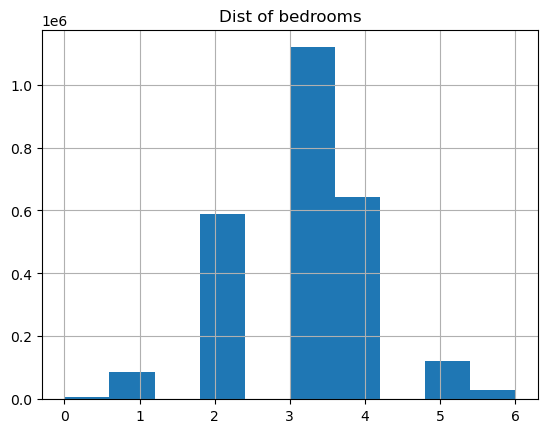

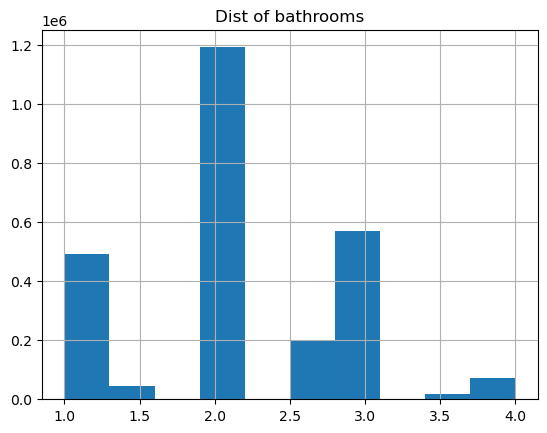

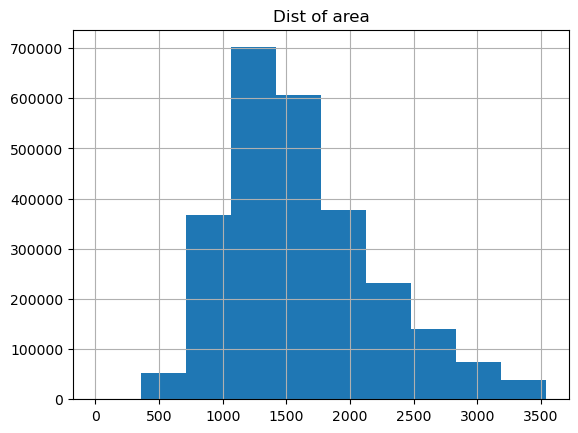

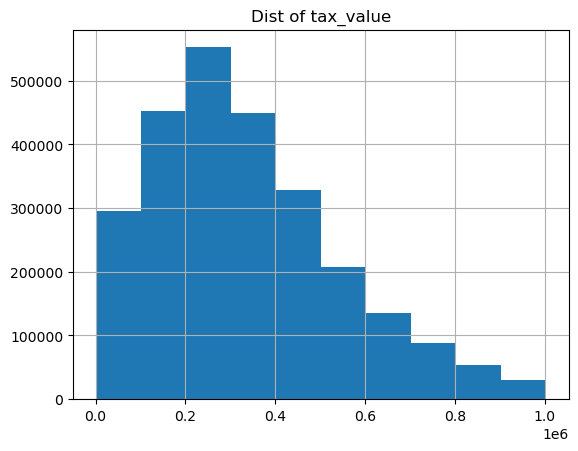

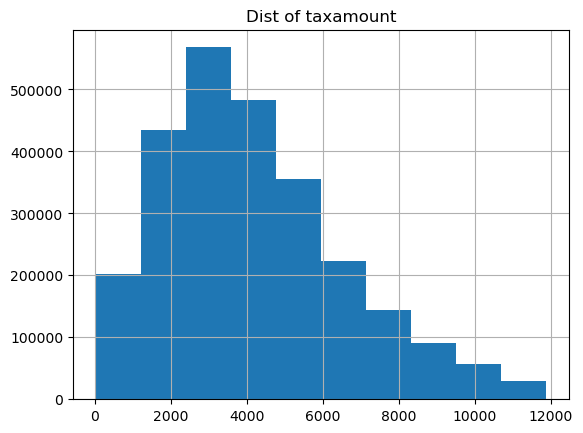

In [55]:
for col in cols:
    df[col].hist()
    plt.title(f'Dist of {col}')
    plt.show()
    print('==========')

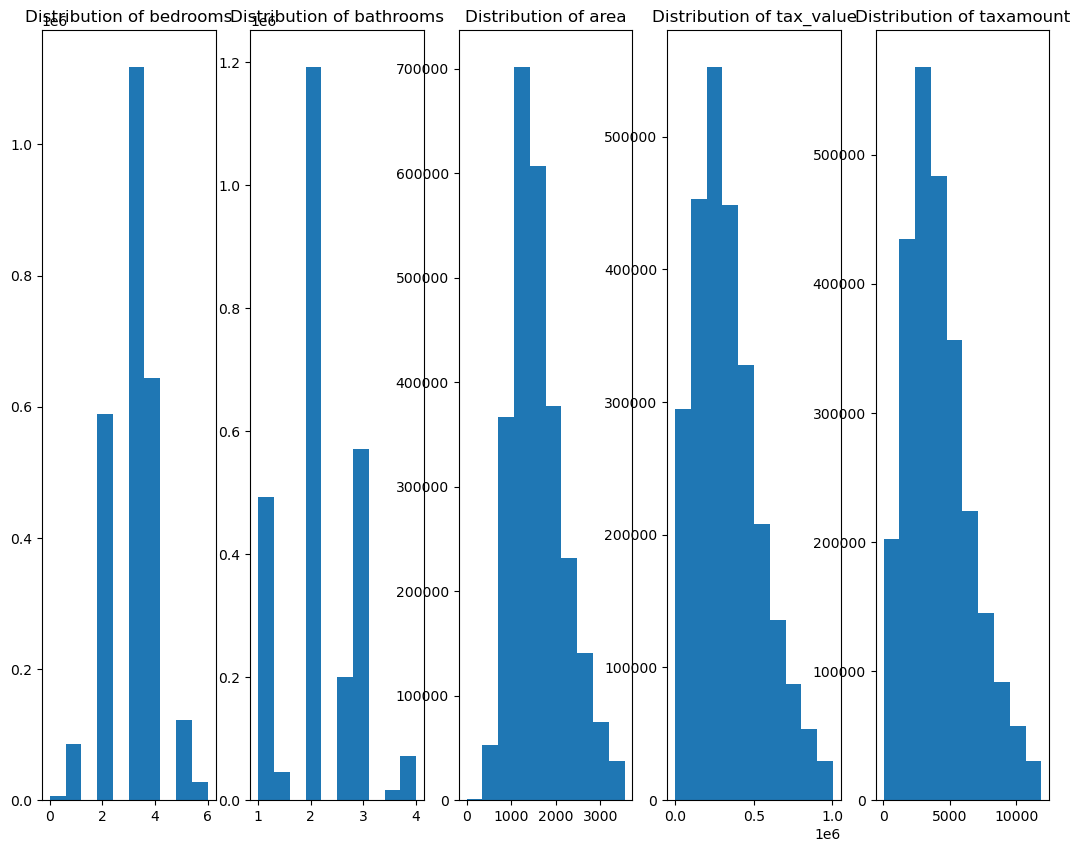

In [56]:
plt.figure(figsize=(13,10))
for i, col in enumerate(cols):
    # our plot numbers start at 1
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
plt.show()

In [58]:
'''Wrangles data from Zillow Database'''

##################################################Wrangle.py###################################################

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from env import user, password, host

#**************************************************Acquire*******************************************************

def acquire_zillow():
    ''' Acquire data from Zillow using env imports and rename columns'''
    
    url = f"mysql+pymysql://{user}:{password}@{host}/zillow"
    
    query = """
            
    SELECT bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
    FROM properties_2017

    LEFT JOIN propertylandusetype USING(propertylandusetypeid)

    WHERE propertylandusedesc IN ("Single Family Residential",                       
                                  "Inferred Single Family Residential")"""

    # get dataframe of data
    df = pd.read_sql(query, url)
    
    
    # renaming column names to one's I like better
    df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                              'bathroomcnt':'bathrooms', 
                              'calculatedfinishedsquarefeet':'area',
                              'taxvaluedollarcnt':'tax_value', 
                              'yearbuilt':'year_built',})
    return df

#**************************************************Remove Outliers*******************************************************

def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

#**************************************************Distributions*******************************************************

def get_hist(df):
    ''' Gets histographs of acquired continuous variables'''
    
    plt.figure(figsize=(16, 3))

    # List of columns
    cols = [col for col in df.columns if col not in ['fips', 'year_built']]

    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display histogram for column.
        df[col].hist(bins=5)

        # Hide gridlines.
        plt.grid(False)

        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)

        plt.tight_layout()

    plt.show()
        
        
def get_box(df):
    ''' Gets boxplots of acquired continuous variables'''
    
    # List of columns
    cols = ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount']

    plt.figure(figsize=(16, 3))

    for i, col in enumerate(cols):

        # i starts at 0, but plot should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=df[[col]])

        # Hide gridlines.
        plt.grid(False)

        # sets proper spacing between plots
        plt.tight_layout()

    plt.show()
        
#**************************************************Prepare*******************************************************

def prepare_zillow(df):
    ''' Prepare zillow data for exploration'''

    # removing outliers
    df = remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'area', 'tax_value', 'taxamount'])
    
    # get distributions of numeric data
    get_hist(df)
    get_box(df)
    
    # converting column datatypes
    df.fips = df.fips.astype(object)
    df.year_built = df.year_built.astype(object)
    
    # train/validate/test split
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    # impute year built using mode
    imputer = SimpleImputer(strategy='median')

    imputer.fit(train[['year_built']])

    train[['year_built']] = imputer.transform(train[['year_built']])
    validate[['year_built']] = imputer.transform(validate[['year_built']])
    test[['year_built']] = imputer.transform(test[['year_built']])       
    
    return train, validate, test    


#**************************************************Wrangle*******************************************************


def wrangle_zillow():
    '''Acquire and prepare data from Zillow database for explore'''
    train, validate, test = prepare_zillow(acquire_zillow())
    z
    return train, validate, test

In [60]:
import wrangle

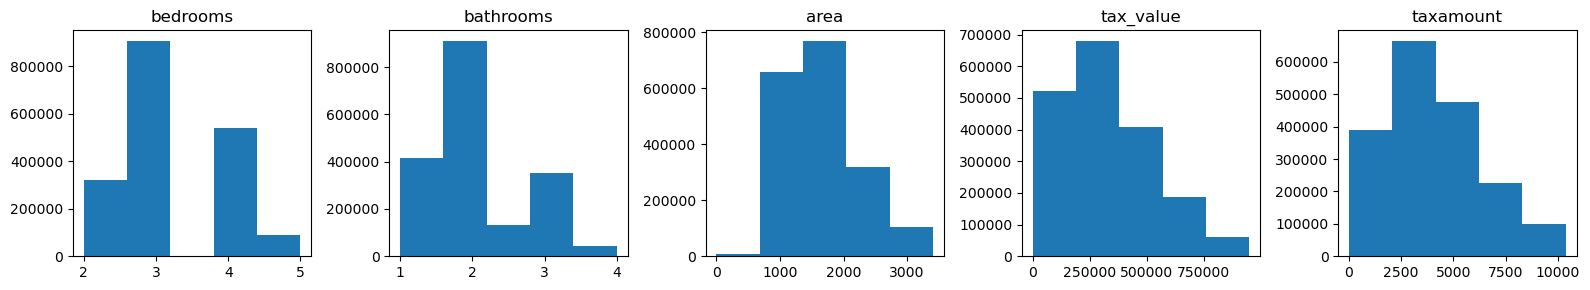

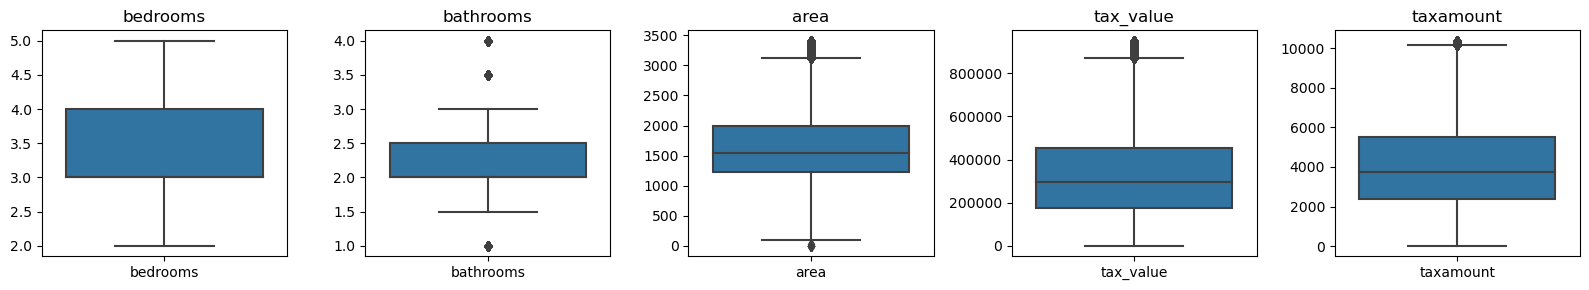

In [63]:
train, val, test = wrangle.wrangle_zillow()

In [64]:
train.shape, val.shape, test.shape


((1038959, 7), (445269, 7), (371057, 7))